In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import random

In [2]:
local=pd.read_csv('군산_지역화폐.csv')

In [3]:
local

,번호,업종,상호,주소,전화번호,행정동
0,1,개인서비스업,수송리치사우나,"전라북도 군산시 진포안1길 19(수송동), 2층",063-462-3131,수송동
1,2,개인서비스업,진실독서실,전라북도 군산시 문화안길 10(나운동),NaN,나운동
2,3,소매업,아모레수송점,전라북도 군산시 월명로270(수송동),063-468-2935,수송동
3,4,소매업,햇살마트,전라북도 군산시 신설1길 3-4 (나운동),063-464-1114,나운동
4,5,음식점업,삼시세끼,"전라북도 군산시 신설2길 5-5(나운동), 1층",NaN,나운동
...,...,...,...,...,...,...
10618,10619,개인서비스업,은하수,전라북도 군산시 상신안길 20 (나운동),NaN,나운동
10619,10620,음식점업,훈이네,전라북도 군산시 구영5길 118-1 (영화동),063-446-5666,영화동
10620,10621,소매업,솔라가드 지곡점,전라북도 군산시 월명로 120,063-465-0297,지곡동
10621,10622,음식점업,장어나라,전라북도 군산시 칠성로 187,NaN,소룡동


In [4]:
list(local)

['번호', '업종', '상호', '주소', '전화번호', '행정동']

In [5]:
local.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10623 entries, 0 to 10622
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      10623 non-null  int64 
 1   업종      10623 non-null  object
 2   상호      10623 non-null  object
 3   주소      10623 non-null  object
 4   전화번호    5957 non-null   object
 5   행정동     10623 non-null  object
dtypes: int64(1), object(5)
memory usage: 498.1+ KB


In [6]:
local.describe()

,번호
count,10623.000000
mean,5312.000000
std,3066.740289
min,1.000000
25%,2656.500000
50%,5312.000000
75%,7967.500000
max,10623.000000


In [7]:
category_range=set(local['업종'])
print(category_range,len(category_range))

{'보건업', '소매업', '스포츠여가관련서비스업', '음식점업', '교육서비스업', '개인서비스업', '숙박업', '기타', '제조업'} 9


In [8]:
local_food=local[local['업종']=='음식점업']
local_sport=local[local['업종']=='스포츠여가관련서비스업']
local_edu=local[local['업종']=='교육서비스업']
local_etc=local[local['업종']=='기타']
local_hotel=local[local['업종']=='숙박업']
local_own=local[local['업종']=='개인서비스업']
local_hospital=local[local['업종']=='보건업']
local_sell=local[local['업종']=='소매업']
local_make=local[local['업종']=='제조업']
local_food.head(10)

,번호,업종,상호,주소,전화번호,행정동
4,5,음식점업,삼시세끼,"전라북도 군산시 신설2길 5-5(나운동), 1층",NaN,나운동
6,7,음식점업,마차분식,전라북도 군산시 공항로 46,063-465-0045,소룡동
10,11,음식점업,더갈비 소룡점,전라북도 군산시 공단대로 601 (소룡동),063-465-7723,소룡동
19,20,음식점업,투썸플레이스전라북도 군산시수송,전라북도 군산시 남수송3길 43,063-471-2624,수송동
20,21,음식점업,카페일구팔오,전라북도 군산시 구영6길 74-1(중앙로1가),NaN,중앙로1가
22,23,음식점업,양평해장국 지곡점,"전라북도 군산시 의료원로 40(지곡동), 1층",NaN,지곡동
40,41,음식점업,양평해장국 미룡점,전라북도 군산시 미제길 14(미룡동),NaN,미룡동
45,46,음식점업,양평해장국 구시장점,"전라북도 군산시 대명4길 9(금암동, 레비뉴스테이), 101호",NaN,금암동
48,49,음식점업,단호프,전라북도 군산시 신평2길 12-8(지곡동),NaN,지곡동
69,70,음식점업,대영반점,전라북도 군산시 조촌4길 31(조촌동),063-452-0886,조촌동


In [9]:
groupdata=local.groupby('업종')
group_by_category=groupdata['업종']
category_count=group_by_category.count()
sorted_category_count=category_count.sort_values(ascending=False)
sorted_category_count

업종
소매업            4448
음식점업           3240
개인서비스업         1740
교육서비스업          365
제조업             339
보건업             266
기타              134
숙박업              62
스포츠여가관련서비스업      29
Name: 업종, dtype: int64

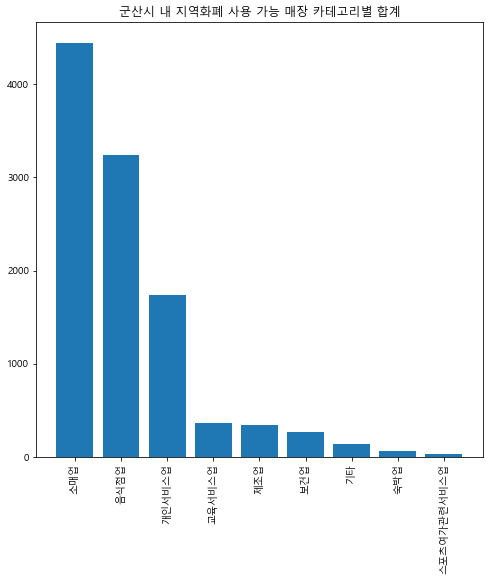

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']="Malgun Gothic"

plt.figure(figsize=(8,8))
plt.bar(sorted_category_count.index, sorted_category_count)
plt.title('군산시 내 지역화폐 사용 가능 매장 카테고리별 합계')
plt.xticks(rotation=90)
plt.show()

## 행정동별 업종 카테고리별 갯수

In [11]:
pd.set_option('display.max_rows',10000)
local.groupby(['행정동','업종']).count()[['번호']]

번호
행정동   업종              
개복동   개인서비스업         1
      소매업           10
      음식점업           3
      제조업            1
개사동   개인서비스업         2
      기타             1
      소매업            5
      제조업            4
개정동   개인서비스업         5
      교육서비스업         1
      기타             1
      보건업            2
      소매업           16
      음식점업           5
개정면   개인서비스업        13
      기타             5
      소매업           30
      음식점업          16
      제조업           12
경암동   개인서비스업        40
      교육서비스업         3
      기타             2
      보건업            6
      소매업          122
      숙박업            2
      음식점업          85
      제조업           10
경장동   개인서비스업        50
      교육서비스업         1
      기타             3
      보건업            2
      소매업           65
      숙박업            8
      스포츠여가관련서비스업    1
      음식점업          25
      제조업           12
구암동   개인서비스업        22
      교육서비스업         2
      소매업           60
      음식점업          26
      제조업            9
금광동   개인서비스업         3
      교육서비스업         1
      보건업            2
      소매업           11
      음식점업           3
금동    개인서비스업         5
      기타             3
      소매업          118
      음식점업          25
      제조업            1
금암동   개인서비스업         2
      교육서비스업         3
      보건업            1
      소매업           26
      음식점업          14
      제조업            4
나운동   개인서비스업       389
      교육서비스업        79
      기타            21
      보건업           72
      소매업          646
      숙박업           14
      스포츠여가관련서비스업    4
      음식점업         635
      제조업           35
나포면   개인서비스업         3
      기타             1
      보건업            2
      소매업           14
      음식점업          12
      제조업            3
내초동   개인서비스업         2
      소매업           15
      음식점업           2
내흥동   개인서비스업         1
      소매업            7
      음식점업           6
      제조업            1
대명동   개인서비스업        18
      교육서비스업         3
      기타             2
      보건업            5
      소매업          152
      음식점업          45
      제조업            7
대야면   개인서비스업        20
      교육서비스업         1
      기타             8
      보건업            6
      소매업          159
      숙박업            1
      음식점업          69
      제조업           17
동흥남동  개인서비스업        15
      교육서비스업         2
      소매업           25
      음식점업           9
      제조업            1
둔율동   개인서비스업         1
      소매업            1
      음식점업           3
      제조업            1
명산동   개인서비스업        24
      교육서비스업         2
      기타             1
      보건업            3
      소매업           69
      음식점업          34
      제조업            5
문화동   개인서비스업        72
      교육서비스업         6
      기타             2
      보건업           10
      소매업          167
      음식점업          65
      제조업           11
미룡동   개인서비스업        95
      교육서비스업        26
      기타             7
      보건업            6
      소매업          116
      스포츠여가관련서비스업    1
      음식점업         177
      제조업            6
미원동   개인서비스업        13
      교육서비스업         1
      기타             1
      보건업            1
      소매업           37
      음식점업          20
      제조업            6
미장동   개인서비스업        76
      교육서비스업        42
      기타             1
      보건업            5
      소매업           74
      스포츠여가관련서비스업    4
      음식점업          83
      제조업            2
비응도동  소매업           54
      숙박업            3
      음식점업          26
      제조업            1
사정동   개인서비스업        10
      기타             1
      소매업           19
      음식점업          14
산북동   개인서비스업        80
      교육서비스업         7
      기타             6
      보건업            3
      소매업          181
      스포츠여가관련서비스업    1
      음식점업         141
      제조업           21
삼학동   개인서비스업        21
      교육서비스업         1
      기타             3
      보건업            2
      소매업           64
      음식점업          37
      제조업            3
서수면   개인서비스업         3
      기타             1
      보건업            1
      소매업           32
      음식점업          18
      제조업            7
서흥남동  개인서비스업        25
      보건업            2
      소매업           45
      숙박업         

In [14]:
gunsan_dong=pd.pivot_table(local, index='업종', columns='행정동',values=['번호'],aggfunc='count', fill_value=0)
gunsan_dong

번호                                        ...                \
행정동         개복동 개사동 개정동 개정면  경암동 경장동 구암동 금광동   금동 금암동  ... 죽성동  중동 중앙로1가   
업종                                                     ...                 
개인서비스업        1   2   5  13   40  50  22   3    5   2  ...   2   6    13   
교육서비스업        0   0   1   0    3   1   2   1    0   3  ...   0   0     1   
기타            0   1   1   5    2   3   0   0    3   0  ...   1   2     0   
보건업           0   0   2   0    6   2   0   2    0   1  ...   2   0     3   
소매업          10   5  16  30  122  65  60  11  118  26  ...  46  15    66   
숙박업           0   0   0   0    2   8   0   0    0   0  ...   0   0     0   
스포츠여가관련서비스업   0   0   0   0    0   1   0   0    0   0  ...   0   0     0   
음식점업          3   0   5  16   85  25  26   3   25  14  ...   7   5    32   
제조업           1   4   0  12   10  12   9   0    1   4  ...   2   1     3   

                                              
행정동         중앙로2가 중앙로3가  지곡동 창성동 평화동 해망동 회현면  
업종                                            
개인서비스업          3     4   73   4   3   5   5  
교육서비스업          0     0   37   0   0   0   2  
기타              1     0    3   0   0   0   0  
보건업             1     1    3   0   1   0   0  
소매업            27    30  133   4  54  81  12  
숙박업             0     1    0   0   0   0   0  
스포츠여가관련서비스업     0     0    1   0   0   0   0  
음식점업            8     8  174   3   4   1  16  
제조업             3     1   14   0   3   2   6  

[9 rows x 62 columns]

<AxesSubplot:xlabel='None-행정동', ylabel='업종'>

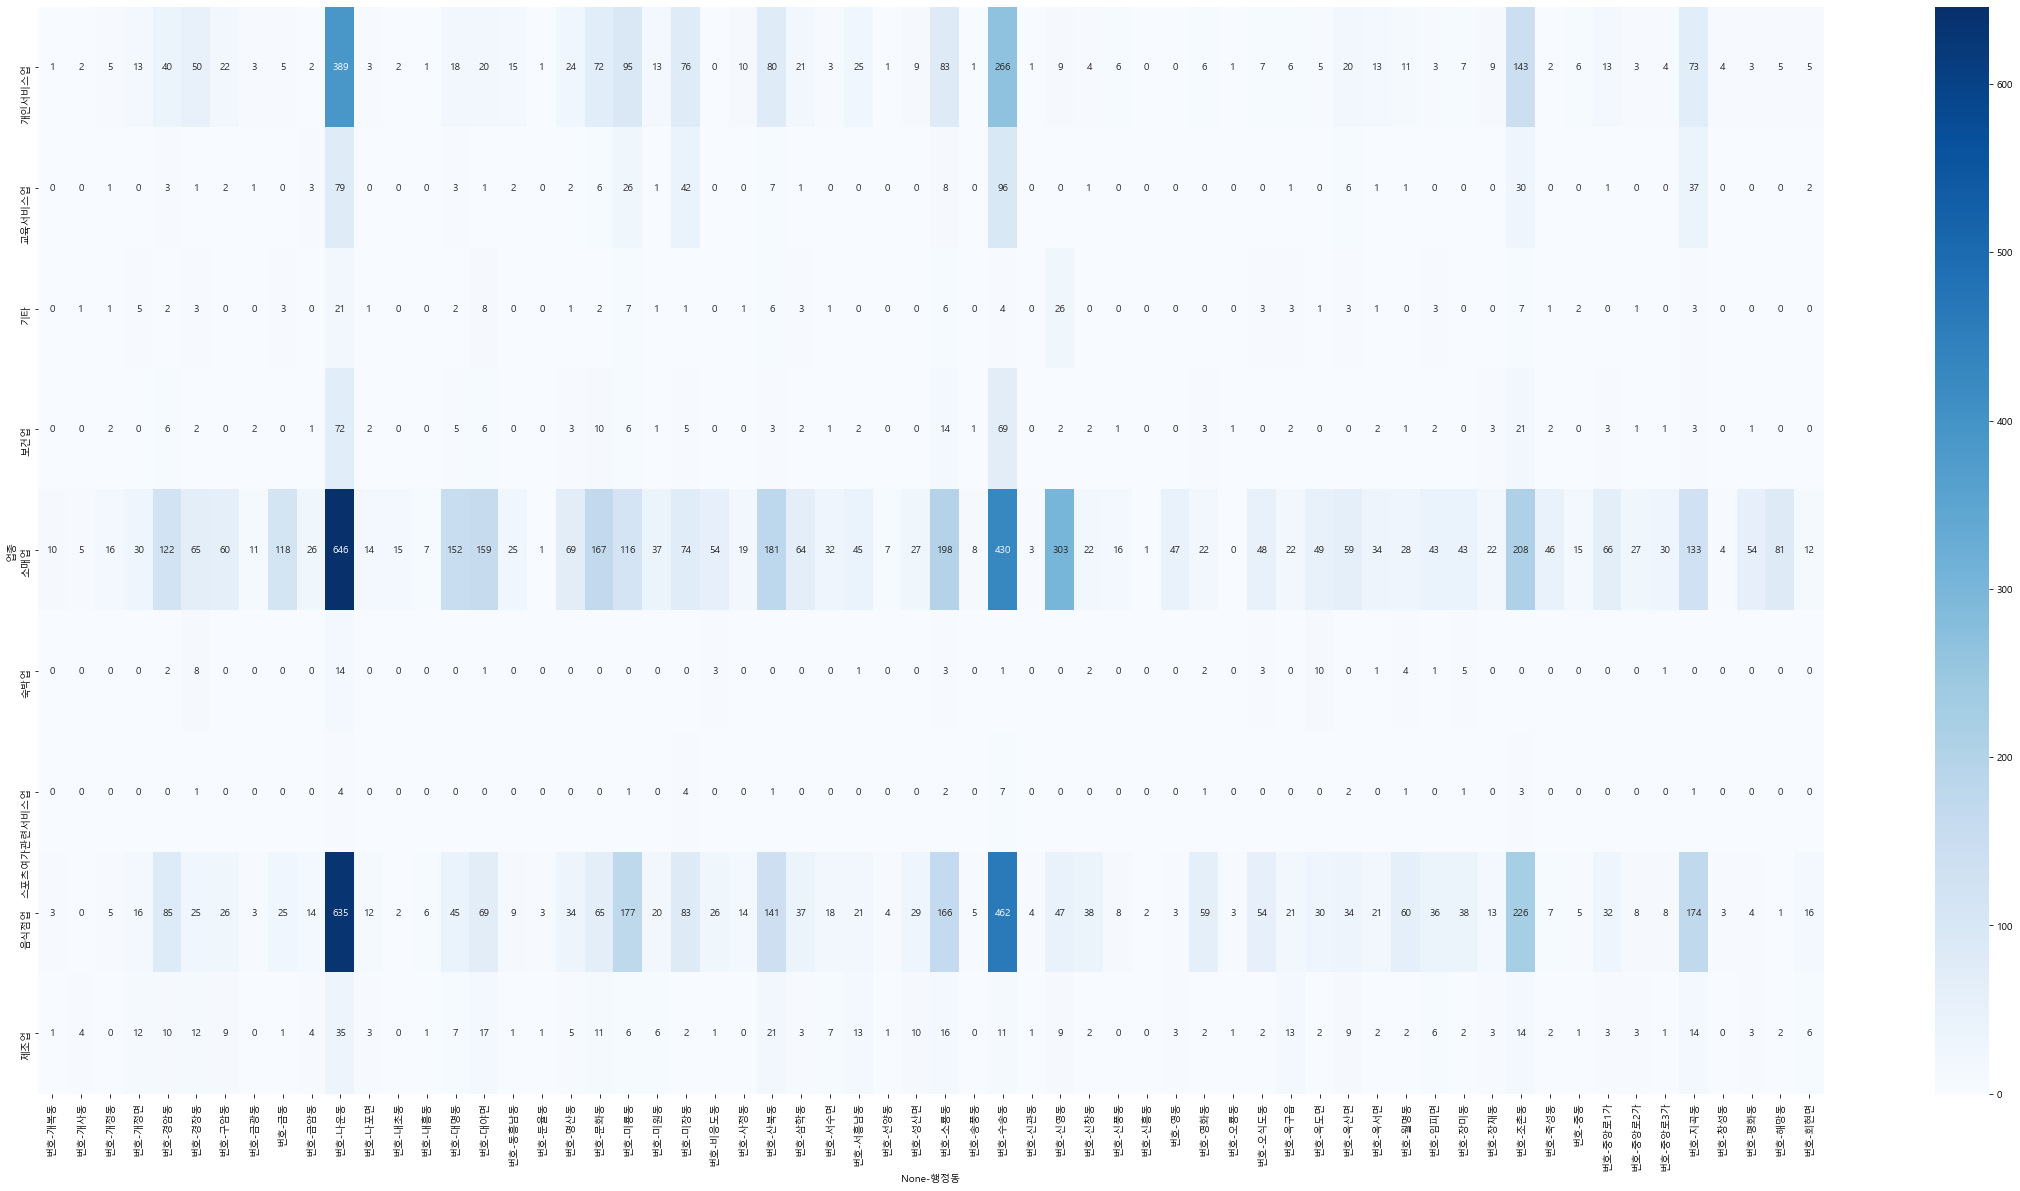

In [21]:
plt.figure(figsize=(40,20))
sns.heatmap(gunsan_dong,annot=True, fmt=".0f",cmap="Blues")

In [ ]:
sns.pairplot(data=gunsan_dong, hue='행정동')